In [1]:
import scipy.stats as stats
from scipy.stats import ttest_1samp
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Introduction to Inference

**Inference** in statistics is the empirical ability to provide solutions to questions using data. 

* Question: Do women get into more car accidents than men?
* Question: Are male cats more likely to survive until adulthood?
* Question: Are blue cars more popular than red cars?

Regardless of the question you might have, we can break it up into two possible hypotheses:

$$H_0: \text{ Null hypothesis that is the outcome that we assume is true} $$
$$H_A: \text{ Alternative hypothesis that is the outcome that we can test} $$

For example, Imagine that Betsy is testing whether women are safer drivers than men. Her null hypothesis is going to be:
$$H_0: \text{ Women are just as safe as men when they drive} $$
and the alternative is
$$H_A: \text{ Women are more likely to get into car accidents than men} $$

## We can never prove the null hypothesis, only fail to reject it.
Statistically, we will never be able to prove that women are the same at driving as men. However, we can look at the data and two possible outcome happen:
* There is insufficient evidence that women are worse at driving than men $\implies$ Fail to reject $H_0$
* There is sufficient evidence that women are worse drivers than men $\implies$ Reject $H_0$ in favor of $H_A$

## Some data on "Age at First Marriage"
Suppose we want to ask (and answer) the following question:

* Is the age that women get married at higher than 18 (the age where they can legal get married without parental consent)?

To answer this, we go out and collect 5,533 married women and ask them to state their age (in years) that they first got married. We can load this up into Python and take a look at the data:

In [2]:
ages = pd.read_csv('os3_data/os3_data/Ch4/age_at_mar.csv')
ages


,age
0,32
1,25
2,24
3,26
4,32
5,29
6,23
7,23
8,29
9,27


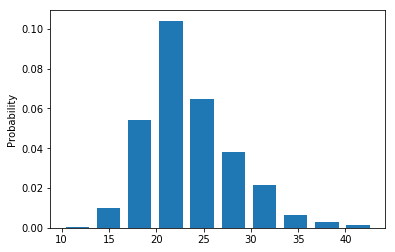

In [3]:
plt.hist(ages['age'], density=1, bins=10, rwidth=0.75)
plt.ylabel('Probability');

This data looks a bit skewed to the right. More than this, it appears that the mean of this sample is actually closer to about 21! We can collect some summary statistics to verify this: 

In [4]:
np.round(ages.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

,count,mean,std,min,max
age,5534.0,23.44,4.72,10.0,43.0


# Does this mean that there is evidence that it is not actually 18?
Not yet. 

To answer this we need to perform a hypothesis test:
$$H_0: \quad \mu=\mu_0$$
$$H_A: \quad \mu\neq \mu_0$$

Here we assume that $\mu \sim N(\mu, \sigma)$

1. Assume the null hypothesis is true.
    * For our example:
$$H_0: \quad \mu=18$$
2. Calculate the **point estimate**: an estimate of the population parameter from a given sample. Here the population parameter is the true value of the mean $\mu$ for the entire population. The point estimate is the estimate of the mean using sample $x$. 
$$ \bar{x}= \frac{1}{n}\sum_{i=1}^{n}x_i =23.44$$

3. Calculate the **standard error**: the standard deviation associated with a point estimate (uncertainty or error of a point estimate)
$$ SE=\frac{\sigma}{\sqrt{n}}=\frac{4.72}{\sqrt{5534}}=0.0634$$

4. Create a confidence interval: a plausible range of vlues for the population parameter. We say that we are $\alpha$% confident that this confidence interval is a confidence interval that contains the true population parameter. Here it is for $\alpha=0.95$ ($z_\alpha=1.96$ is the z-score with 95% of the data between $\pm z_\alpha$): 
$$\bar{x} \pm z_\alpha \times SE = [23.3157,23.5642] $$

5. Determine if the null hypothesis is confirmed in this interval. 
    - Since $19\notin [23.3157,23.5642]$ we can **reject the null hypothesis with 95% confidence**

# Decision Errors
We have found evidence in favor of the alternative hypothesis that $\mu \neq 18$

* Type 1 Decision Error: $H_0$ is true but you reject it
* Type 2 Decision Error: $H_A$ is true but you do not reject the null

The probability of a Type 1 error is $1-\alpha$ which is the probability in the tails of the distribution where $H_0$ is assumed true:
![Type 1 Error](http://web.mnstate.edu/malonech/images/hypoth3.jpg)
Source: http://web.mnstate.edu/malonech/images/hypoth3.jpg

### A 95% Confidence interval leads to a 5% chance of making a Type 1 error
* For our example, a 5% chance that the average age is actually 18 but we reject it. 

# Testing with p-values and critical values

## P-values
A **p-value** is the probability of observing a sample mean at least as favorable to the alternative hypothesis as our current data set if $H_0$ is true 
* Assume that $H_0: \mu = 18$ is true and the $SE = 0.0634$

Then the normal distribution would look like:


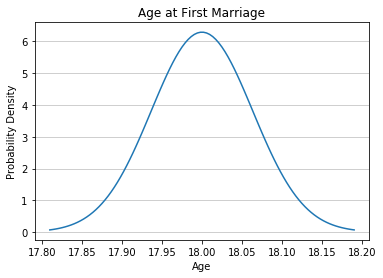

In [5]:
mu = 18
sigma = 0.0634
y = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(y, stats.norm.pdf(y, mu, sigma))
plt.title('Age at First Marriage')
plt.ylabel('Probability Density')
plt.xlabel('Age')
plt.grid(axis='y', alpha=0.75)

#### As we can see, it is highly unlikely to get an $\bar{x}$ at or over 23.44. 

Using a [Normal Distribution Probability Table](stat_prob_table.pdf) we can easily see that the probability of seeing this is effectively zero:
$$p-val \approx 0$$

## Rule:  If $p-value<1-\alpha$, reject the null hypothesis in favor of the alternative

## Rule:  If $p-value\geq 1-\alpha$, fail to reject (accept) the null hypothesis

In [6]:
alpha = 0.05
ages_mean = np.mean(ages['age'])
print(ages_mean)
tset, pval = ttest_1samp(ages['age'], 18)
print('p-values',pval)

if pval < 1-alpha:    # alpha value is 0.05 or 5%
   print("Reject Null")
else:
  print("Accept Null")

23.440187929165162
p-values 0.0
Reject Null


## Critical Values
A **critical value** is the Z-score $Z^*$ that has $1-\alpha$ in the tail(s). We can then create a standardized test statistic:
$$Z= \frac{\bar{x}-\mu_0}{SE}$$

* One-sided Upper: If $Z>Z^*$, then reject the null hypothesis
* One-sided Lower: If $Z<Z^*$, then reject the null hypothesis
* Two-sided: If $Z>|Z^*|$, then reject the null hypothesis

### Example: our one sided test
* $\alpha=0.95$
* Critical Value: $Z^*=1.65$
* Test statistic: 

In [7]:
se = stats.sem(ages)
se= se[0]
Z = (ages_mean - 18)/se

Z

85.71678794218256

#### Since $Z>Z^*$, we reject the null hypothesis in favor of the alternative that the average age is higher than 18.